In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [3]:
# Example input data (replace these with actual values)
npoints = 100  # Number of points in the trace
sampr = 0.05   # Sampling rate
tshft = 0   # Time shift
swpol = 1      # Polarity switch
maxd = 1.0e-5  # Maximum amplitude
sname = "Trace 1"  # Trace name
event='200124_175524'
aqfile = '/sns/seismoml/test_waveforms/Astack/Output_data/asf200124_175524.aq'
trrfile = '/sns/seismoml/test_waveforms/Astack/Output_data/ts200124_175524.ttr'

#read in data from 7th line aq file
#data = np.loadtxt('asf200107_.aq', skiprows=6)
#data = np.loadtxt('asf200107_.aq', skiprows=1)
#print(data)



In [4]:
import glob
import os

# Define the directory containing the files
directory = "/sns/seismoml/test_waveforms/Astack/Input_data"

# Define the pattern to match files
pattern = os.path.join(directory, "ts??????_??????.ttr")

# List all files matching the pattern
files = glob.glob(pattern)

# Print the list of files
print("Files matching the pattern:")
for file in files:
    print(file)
    filename = os.path.basename(file)
    search_string = filename[2:9]
    event_file = glob.glob(f"20{search_string}*")
    event=event_file[0].split('.')[0]
    print(event, event_file)

Files matching the pattern:


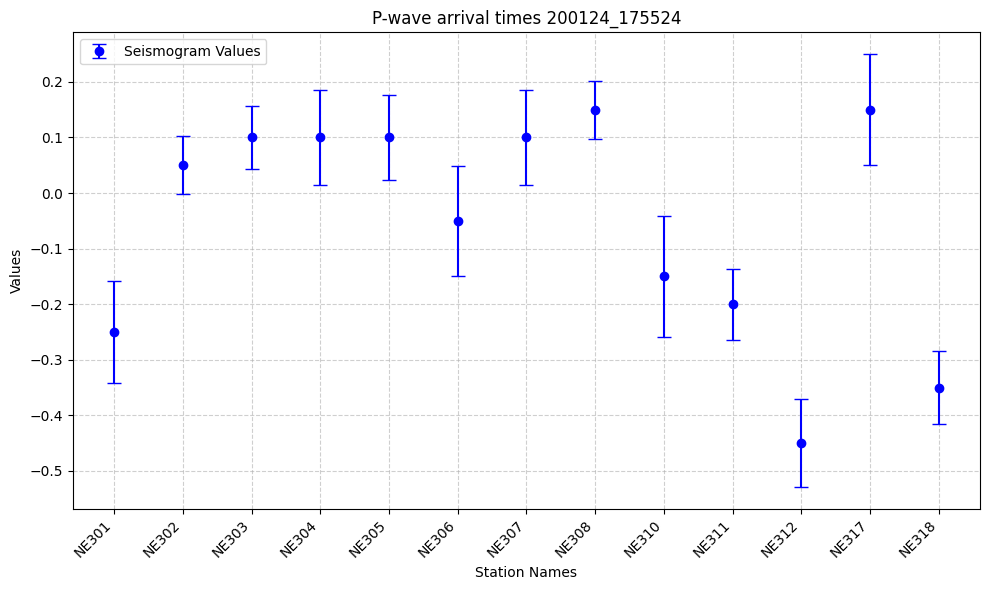

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


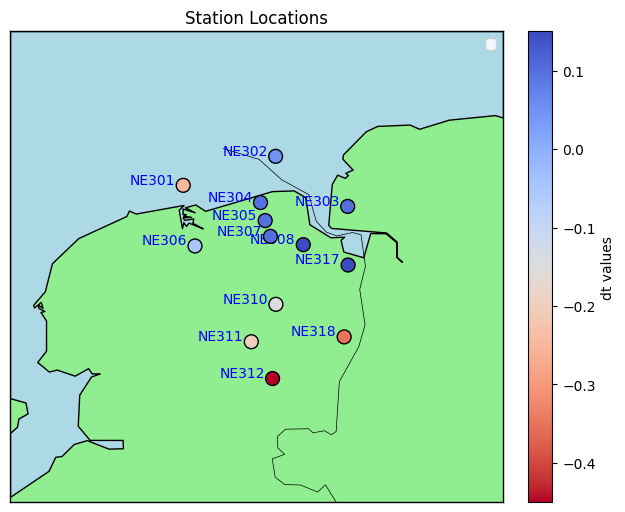

In [5]:
# Initialize lists to store data
names = []
values = []
errors = []

station_file = '/sns/seismoml/test_waveforms/files/Input_files/deepNL_station_locations.txt'

with open(trrfile, "r") as file:
    lines = file.readlines()[8:]  # Start from line 9 (index 8 in Python)
    for line in lines:
        parts = line.split()
        if len(parts) >= 4:  # Ensure the line has enough columns
            names.append(parts[1])  # Second column: station names
            values.append(float(parts[2]))  # Third column: values
            errors.append(float(parts[3]))  # Fourth column: error bars

# Convert values and errors to NumPy arrays for plotting
values = np.array(values)
errors = np.array(errors)

# Plot the data
plt.figure(figsize=(10, 6))
plt.errorbar(names, values, yerr=errors, fmt='o', capsize=5, label="Seismogram Values", color='blue')

# Customize the plot
plt.xlabel("Station Names")
plt.ylabel("Values")
plt.title("P-wave arrival times "+event)
plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

station_latitudes = []
station_longitudes = []


for name in names:
    # get station names, latitude and longitude from station file
    with open(station_file, "r") as file:
        lines = file.readlines()
        for line in lines:
            parts = line.split()
            if len(parts) >= 3:  # Ensure the line has enough columns
                if name == parts[0]:
                    lat = float(parts[1])
                    lon = float(parts[2])
                    station_latitudes.append(lat)
                    station_longitudes.append(lon)
                    break
        else:
            print(f"Station {name} not found in the station file")
            continue

fig = plt.figure(figsize=(7, 7))
m = Basemap(projection='merc', llcrnrlat=52.4, urcrnrlat=54, llcrnrlon=5.2, urcrnrlon=8, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgreen', lake_color='aqua')
fig.show()
norm = plt.Normalize(np.min(values), np.max(values))
cmap = plt.cm.coolwarm_r

# Convert latitudes and longitudes to map coordinates
x, y = m(station_longitudes, station_latitudes)
sc = m.scatter(x, y, c=values, cmap=cmap, norm=norm, s=100, edgecolor='k', zorder=5)

cb = m.colorbar(sc, location='right', pad='5%')
cb.set_label('dt values')

# Add station names as labels
for i, name in enumerate(names):
        x_name, y_name = x[i]-5000, y[i]+1000
        plt.text(x_name, y_name, name, fontsize=10, ha='right', color='blue')

plt.title("Station Locations")
plt.legend()
plt.show()

Label: /sns/seismoml/test_waveforms/Astack/Output_data/asf200124_175524.aq   38.29   39.02   12.0km  24/01/2020 17:55:24.00
0
Station Header: swpol=1.0, npoints=1200, tshft=-0.25, sname=NE301
[-190.326172  -338.954926  -293.845947  ...  -21.9516106  -20.2085495
   23.2822094]
1
Station Header: swpol=1.0, npoints=1200, tshft=0.0500000007, sname=NE302
[-57.0049706  -92.2647781  -63.8244896  ...  80.8828888   13.4747801
   8.41641045]
2
Station Header: swpol=1.0, npoints=1200, tshft=0.100000001, sname=NE303
[-225.304474  -401.629913  -349.739807  ...   21.1237297  -13.4014797
   28.3101902]
3
Station Header: swpol=1.0, npoints=1200, tshft=0.100000001, sname=NE304
[ -72.471199   -126.653679   -105.638451   ...   45.4011192     4.37827015
    9.74625969]
4
Station Header: swpol=1.0, npoints=1200, tshft=0.100000001, sname=NE305
[-111.242317   -196.877045   -167.911118   ...   58.9112587     4.27349997
   14.77458   ]
5
Station Header: swpol=1.0, npoints=1200, tshft=-0.0500000007, sname=NE306

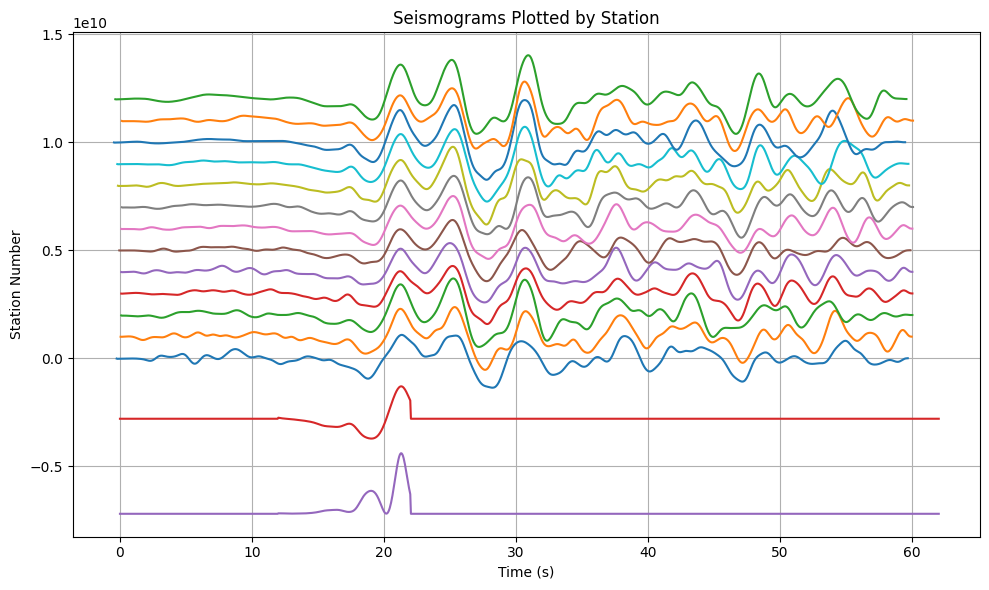

'\n        # Plot trace\n        plt.figure(figsize=(10, 6))\n        plt.plot(ptim, amp, label=sname)\n\n        # Apply labels to each trace\n        x = 0.02 * npoints * sampr\n        z = amp[0] + 0.1  # Adjust label position based on the first amplitude value\n        plt.text(x, z, sname, fontsize=12, color=\'red\')\n\n        # Add plot labels and grid\n        plt.xlabel("Time (s)")\n        plt.ylabel("Amplitude")\n        plt.title("Trace Plot")\n        plt.grid(True)\n        plt.legend()\n\n        # Show the plot\n        plt.show()"\n'

In [47]:
with open(aqfile, "r") as file:
    # Read the number of stations
    ns = int(file.readline().strip())
    
    # Read the event latitude, longitude, and depth
    elat, elon, depth = map(float, file.readline().strip().split())
    
    # Read the event date (year, month, day)
    year, month, day = map(int, file.readline().strip().split())
    
    # Read the event time (hour, minute, second)
    hour, minute, second = map(float, file.readline().strip().split())
    
    # Read the sampling rate
    sampr = float(file.readline().strip())
    
    # Format the label (similar to the Fortran `write` statement)
    label = f"{aqfile} {elat:7.2f} {elon:7.2f} {depth:6.1f}km  {day:02}/{month:02}/{year:04} {int(hour):02}:{int(minute):02}:{second:05.2f}"
    print("Label:", label)
    
    # loop over the stations and get the header and the data for each
    plt.figure(figsize=(10, 6))
    for i in range(ns):
        print(i)
        # Read the header of the first station
        line = file.readline().strip().split()
        swpol = float(line[0])  # Polarity switch
        npoints = int(line[1])  # Number of points
        tshft = float(line[2])  # Time shift
        sname = line[3]  # Station name (string)
        
        # Print the station header information
        print(f"Station Header: swpol={swpol}, npoints={npoints}, tshft={tshft}, sname={sname}")

        #data=file.readline().strip()
        #print(data)
        #get values from one line of numbers in an array from the file
        data = np.array([float(x) for x in file.readline().strip().split()])
        print(data)
        if i == 13:
            data=data*20000
        if i == 14:
            data=data*5000
        if maxd > 1.0e-6:
            amp = swpol * data / (1.333 * maxd) + np.arange(1, npoints + 1)
        else:
            amp = swpol * data + np.arange(1, npoints + 1)

        # Apply time shift
        ptim = np.arange(npoints) * sampr + tshft

        # Offset each waveform by its station number (i+1) for separation
        if i < 13:
            plt.plot(ptim, amp + i*1e9, label=f"Station {i+1}")
        elif i == 13:
            plt.plot(ptim, amp - (i+1)*2*1e8, label=f"Station {i+1}")
        elif i == 14:
            plt.plot(ptim, amp - (i+10)*3*1e8, label=f"Station {i+1}")

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Station Number")
plt.title("Seismograms Plotted by Station")
#nr=int(ns*1e8)
#plt.yticks(range(1,ns))
#plt.yticks(range(1, ns + 1e8), [f"Station {i+1}" for i in range(ns)])  # Label Y-axis with station numbers
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
"""
        # Plot trace
        plt.figure(figsize=(10, 6))
        plt.plot(ptim, amp, label=sname)

        # Apply labels to each trace
        x = 0.02 * npoints * sampr
        z = amp[0] + 0.1  # Adjust label position based on the first amplitude value
        plt.text(x, z, sname, fontsize=12, color='red')

        # Add plot labels and grid
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title("Trace Plot")
        plt.grid(True)
        plt.legend()

        # Show the plot
        plt.show()"
"""

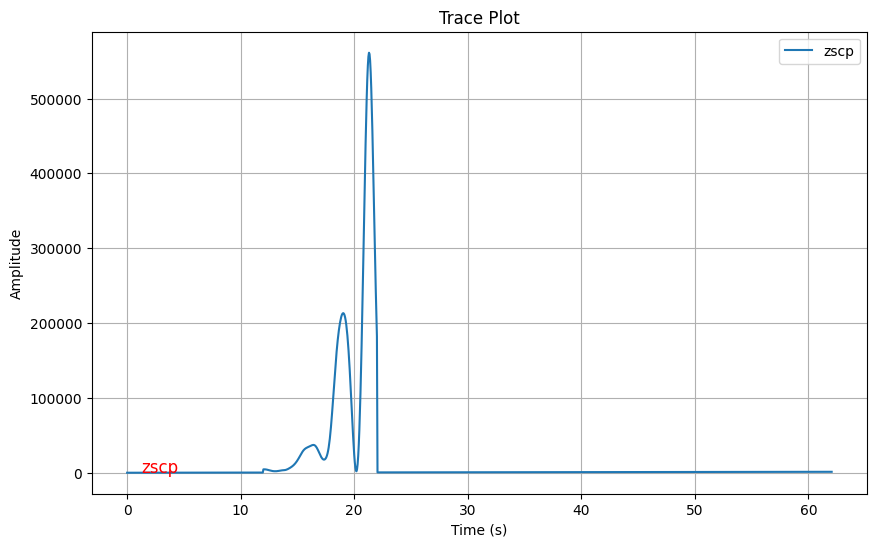

In [7]:
#amp = np.array(data, dtype=float)
# Apply normalization and DC offset for plotting
if maxd > 1.0e-6:
    amp = swpol * data / (1.333 * maxd) + np.arange(1, npoints + 1)
else:
    amp = swpol * data + np.arange(1, npoints + 1)

# Apply time shift
ptim = np.arange(npoints) * sampr + tshft

# Plot trace
plt.figure(figsize=(10, 6))
plt.plot(ptim, amp, label=sname)

# Apply labels to each trace
x = 0.02 * npoints * sampr
z = amp[0] + 0.1  # Adjust label position based on the first amplitude value
plt.text(x, z, sname, fontsize=12, color='red')

# Add plot labels and grid
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Trace Plot")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()